In [1]:
import numpy as np
import pandas as pd
import h5py
import os
import imageio
from skimage import color
from skimage import transform
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import hog
from scipy.fftpack import dct, idct
import matplotlib.pylab as plt
from math import floor
import seaborn as sn

In [2]:
def histogram(ima, num_coeffs=100, width=40):

    # Convert to grayscale if color
    if len(ima.shape) == 3:
        ima = color.rgb2gray(ima)

    # Resize to width x width
    x = transform.resize(ima, (width,width))

    coeffs = ima.flatten()
    
    return np.histogram(coeffs, bins=num_coeffs)[0]


def DCT_2D(ima, num_coeffs=100, width=40): 

    # implement 2D DCT
    def dct2(a):
        return dct(dct(a.T, norm='ortho').T, norm='ortho')

    im = rgb2gray(ima) 
    im = transform.resize(im, (width, width))
    imF = dct2(im)

    zigzag = np.concatenate([np.diagonal(imF[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-imF.shape[0], imF.shape[0])])
    
    return zigzag[0:num_coeffs]


def HOG(ima, width=40):

    ima = color.rgb2gray(ima)
    ima = transform.resize(ima, (width, width))

    fd = hog(ima, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False,  multichannel=None)

    return fd

[ 24  64  85 104 146 192 236 276 299 289 307 275 275 307 307 289 272 256
 247 220 214 193 218 186 175 229 198 201 207 215 167 179 204 175 172 210
 174 178 219 200 205 240 263 231 245 254 274 265 311 295 343 358 317 334
 337 334 388 413 479 432 494 553 570 521 579 532 524 500 471 493 454 393
 380 343 380 344 319 265 240 147 140 128  95  89  86  47  61  55  44  33
  15  17   2   5   1   0   0   1   1   1]


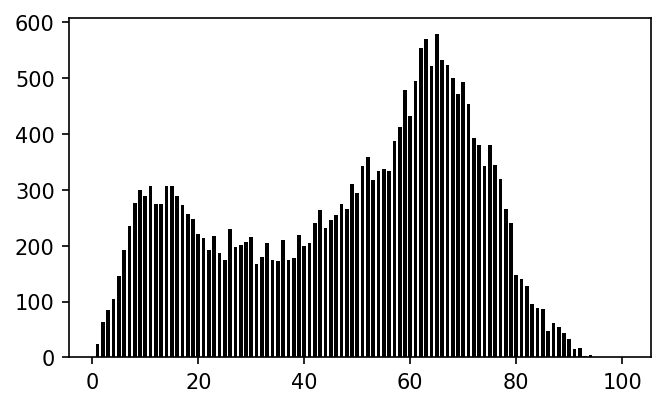

In [3]:
# histogram

ima = imageio.imread('agnes.jpg')

coeffs = histogram(ima)

width =  0.7

fig, ax = plt.subplots(1, 1, figsize = ([5, 3]), dpi = 150)
le = np.linspace(1, len(coeffs), num = len(coeffs))

ax.bar(le, coeffs, color = 'k', width = width)

print(coeffs)

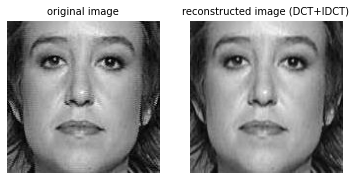

In [4]:
# DCT 2D

num_coeffs = 100

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# read image and convert to grayscale
im = rgb2gray(imread('agnes.jpg')) 
imF = dct2(im)
im1 = idct2(imF[0:num_coeffs])

im1 = transform.resize(im1, im.shape)

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=10)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=10)
plt.show()

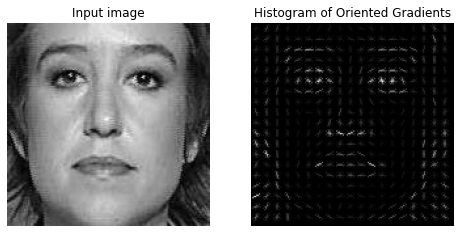

In [5]:
# HOG

from skimage import exposure

ima = rgb2gray(imread('agnes.jpg')) 

fd, hog_image = hog(ima, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=True, transform_sqrt=False,  multichannel=None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(ima, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()